Tutorial for Mickey
================

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mickey.mickey
import mickey.plot
import nmmn.lsd

In [3]:
%cd ~/codes/mickey/examples/

/home/nemmen/codes/mickey/examples


# Read a given simulation state

Reads snapshot 3678

In [4]:
p=mickey.mickey.Pluto(3678)

Reading Data file : /home/nemmen/codes/mickey/examples/data.3678.dbl


To supress the status message, use 

    c=mickey.mickey.Pluto(3678, stdout=False)

# Access model variables

The *c* object's now holds attributes corresponding to the variables of your snapshot. For instance:
	
- grid: `x1`,`x2`,`x3` (1D arrays)
- velocities: `v1`, `v2`, `v3` (N-dimensional, depending on your model)
- pressure `p` (N-dimensional)
- density `rho` (N-dimensional)
- number of grid cells: `n1`, `n2`, `n3` (integers)
- time in code units: `t` (float)

In [10]:
p.x1.shape

(400,)

In [11]:
p.rho.shape

(400, 200)

# Plot the coordinate grid

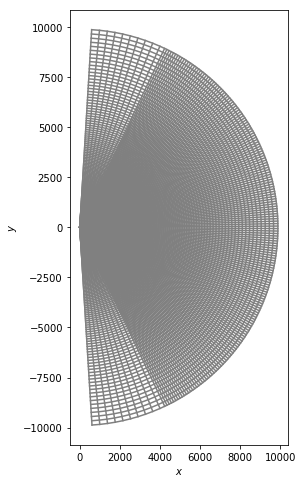

In [19]:
# plot coordinate grid
figure(figsize=(8,8))
mickey.plot.mesh(p)

# Plot density field

/home/nemmen/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


CPU times: user 160 ms, sys: 161 µs, total: 160 ms
Wall time: 34.1 ms


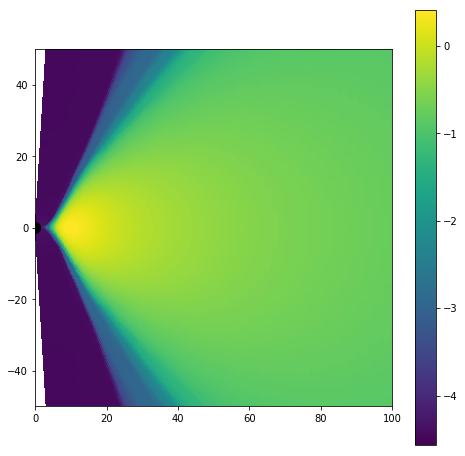

In [5]:
%%time
figure(figsize=(8,8))
pcolormesh(p.X, p.Y, log10(p.rho.T))
#axes().set_aspect('equal')
circle2=Circle((0,0),p.x1[0],color='k')
gca().add_artist(circle2)
xlim(0,100)
ylim(-50,50)
colorbar()
axes().set_aspect('equal')

We have a shortcut for the plotting commands above in `mickey.plot`, for convenience:

/home/nemmen/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


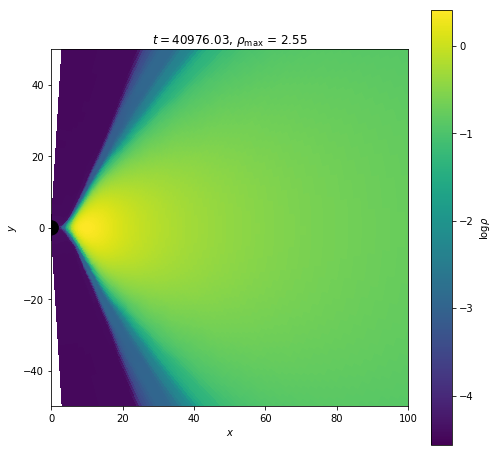

In [8]:
figure(figsize=(8,8))
mickey.plot.density(p, lim=50, bh=[2,'k'])

# Change coordinate basis from spherical to a regular cartesian grid

If for some reason you need to change the coordinate basis of the arrays, such that instead of having a density image in spherical coordinates (e.g. rows = theta, columns = r) you need it in cartesian (rows = y, cols = x), then you need to perform what we call "regrid". This procedure consists of creating a new uniform cartesian grid and convert the values from the previous grid to the new one. 

We have special C-extensions to perform these tasks *very fast*. First you need to install the [PGI compilers](https://www.pgroup.com) ([installation instructions](https://intothewave.wordpress.com/2015/02/17/pgi-fortran-compiler-on-linux-mac-os-x/)) which come with `pgcc`. 

If you have a NVIDIA GPU, good for you! Assuming you have all drivers and the PGI compiler installed, issue:

    cd src
    make

By default, the code compiles with GPU support. The code also works in CPUs though not so fast. In this case, please compile with:

    make CPU=1

If you had the PGI compiler already installed when you installed Mickey itself, then the C-code was compiled automatically. Otherwise, you have to do it manually.

Converts the arrays from the original spherical grid that was used to solve the equations to a new cartesian grid, using the GPU

In [9]:
%time c=p.regridFast(n=1500, xlim=100) # cartesian

CPU times: user 2.45 s, sys: 124 ms, total: 2.58 s
Wall time: 459 ms


To check that things are consistent in the new grid, you can plot it manually:

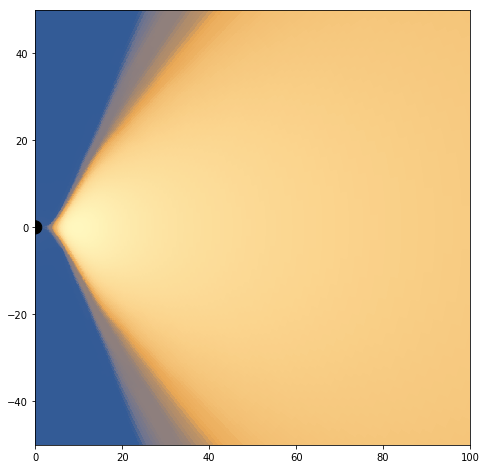

In [41]:
import nmmn.plots 

figure(figsize=(8,8))
pcolormesh(c.X1, c.X2, log10(c.rho), cmap=nmmn.plots.wolframcmap())
#axes().set_aspect('equal')
circle2=Circle((0,0),p.x1[0],color='k')
gca().add_artist(circle2)
xlim(0,100)
ylim(-50,50)
axes().set_aspect('equal')

# sandbox

In [9]:
r=p.x1
th=-(p.x2-numpy.pi/2.) # spherical angle => polar angle

R,TH=meshgrid(r,th)

In [19]:
p.rho.shape

(400, 200)

In [10]:
X,Y=nmmn.misc.pol2cart(R,TH)

In [6]:
import importlib

In [7]:
importlib.reload(mickey.plot)

<module 'mickey.plot' from '/home/nemmen/codes/mickey/mickey/plot.py'>